In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_excel(('Dataset2.xlsx'),sheet_name="Sheet2")
display(df)

,Year,Export Value,Poverty,Tax Income,Urban Population,"Agriculture, Forestry, Fishing",Exchange Rate to US$,GDP Growth
0,1960,NaN,NaN,NaN,14.586,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,14.821,NaN,NaN,5.740646
2,1962,NaN,NaN,NaN,15.058,NaN,NaN,1.841978
3,1963,NaN,NaN,NaN,15.299,NaN,NaN,-2.237030
4,1964,NaN,NaN,NaN,15.543,NaN,NaN,3.529698
...,...,...,...,...,...,...,...,...
59,2019,NaN,4.4,1960633.60,55.985,12.712603,14130.583333,5.019288
60,2020,163191.8,3.8,1647783.34,56.641,13.698414,14625.250000,-2.065512
61,2021,231609.5,3.5,2011347.10,57.290,13.280217,14344.916667,3.703055
62,2022,291904.3,2.5,2436877.80,57.934,12.399659,14916.750000,5.308595


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            64 non-null     int64  
 1   Export Value                    10 non-null     float64
 2   Poverty                         30 non-null     float64
 3   Tax Income                      17 non-null     float64
 4   Urban Population                63 non-null     float64
 5   Agriculture, Forestry, Fishing  40 non-null     float64
 6   Exchange Rate to US$            28 non-null     float64
 7   GDP Growth                      62 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,64.0,1.991500e+03,18.618987,1960.000000,1.975750e+03,1.991500e+03,2.007250e+03,2.023000e+03
Export Value,10.0,1.858177e+05,48928.204328,116510.000000,1.591323e+05,1.792659e+05,2.001275e+05,2.919043e+05
Poverty,30.0,2.799333e+01,22.694416,2.500000,8.550000e+00,2.465000e+01,4.267500e+01,7.430000e+01
Tax Income,17.0,1.543869e+06,509289.611025,707806.100000,1.210600e+06,1.550491e+06,1.943675e+06,2.443592e+06
Urban Population,63.0,3.362443e+01,14.538983,14.586000,1.958500e+01,3.161300e+01,4.713650e+01,5.793400e+01
"Agriculture, Forestry, Fishing",40.0,1.673981e+01,3.959626,12.399659,1.345255e+01,1.548443e+01,1.954423e+01,2.425344e+01
Exchange Rate to US$,28.0,1.048356e+04,3131.680333,2383.000000,9.039292e+03,9.683333e+03,1.341302e+04,1.502057e+04
GDP Growth,62.0,5.111197e+00,3.373370,-13.126725,4.646623e+00,5.617591e+00,6.985555e+00,1.091518e+01


In [5]:
df_clean = df.dropna()

In [6]:
df_clean

,Year,Export Value,Poverty,Tax Income,Urban Population,"Agriculture, Forestry, Fishing",Exchange Rate to US$,GDP Growth
49,2009,116510.0,21.0,848763.20,49.134,15.290148,10356.166667,4.628871
50,2010,157779.1,18.3,995271.50,49.914,13.929213,9078.250000,6.223854
51,2011,203496.6,15.7,1210599.70,50.595,13.512287,8773.250000,6.169784
52,2012,190020.3,13.7,1338109.60,51.276,13.373974,9418.583333,6.030051
53,2013,182551.8,11.2,1438891.10,51.955,13.356699,10562.666667,5.557264
54,2014,175980.0,9.3,1550490.80,52.635,13.336755,11884.500000,5.006668
56,2016,145134.0,7.5,1555934.20,53.989,13.478749,13329.833333,5.033069
60,2020,163191.8,3.8,1647783.34,56.641,13.698414,14625.250000,-2.065512
61,2021,231609.5,3.5,2011347.10,57.290,13.280217,14344.916667,3.703055
62,2022,291904.3,2.5,2436877.80,57.934,12.399659,14916.750000,5.308595


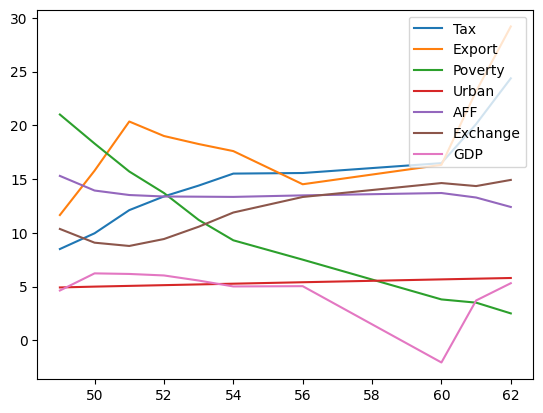

In [7]:
plt.plot(df_clean["Tax Income"] / 100000, label = "Tax")
plt.plot(df_clean["Export Value"] / 10000, label = "Export")
plt.plot(df_clean["Poverty"], label = "Poverty")
plt.plot(df_clean["Urban Population"] / 10, label = "Urban")
plt.plot(df_clean["Agriculture, Forestry, Fishing"], label = "AFF")
plt.plot(df_clean["Exchange Rate to US$"] / 1000, label = "Exchange")
plt.plot(df_clean["GDP Growth"], label = "GDP")
plt.legend(loc = 'upper right')

<Axes: >

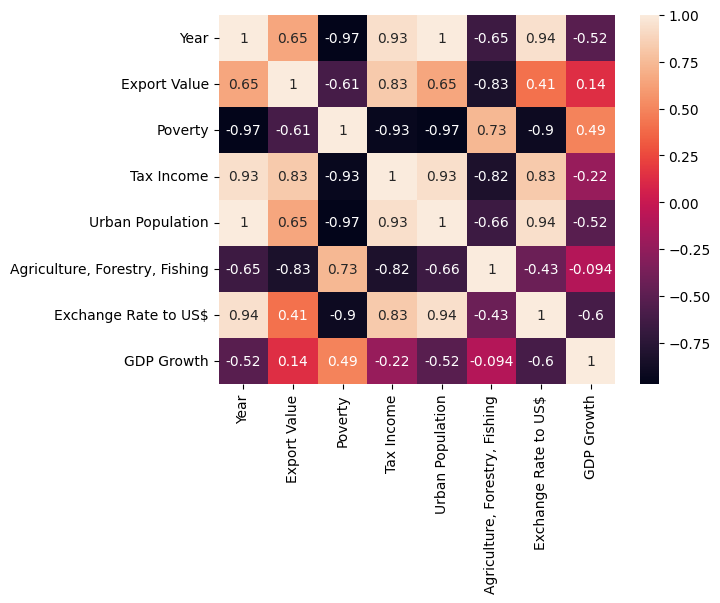

In [8]:
sns.heatmap(df_clean.corr(), annot=True)

<Axes: xlabel='Tax Income', ylabel='GDP Growth'>

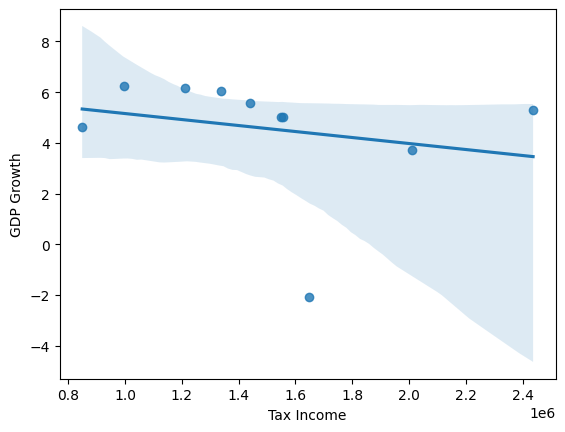

In [9]:
sns.regplot(df_clean, x = "Tax Income", y = "GDP Growth")

In [10]:
lr = LinearRegression()

In [14]:
summary = lr.fit(df_clean.drop("GDP Growth", axis = 1), df_clean["GDP Growth"])

In [15]:
print(summary)

LinearRegression()


In [17]:
summary.score(df_clean.drop("GDP Growth", axis = 1), df_clean["GDP Growth"])

0.9854354504397438

In [12]:
#'a' in ax+b model
lr.coef_

array([-8.15276439e+01, -1.74167438e-05,  2.21497375e+00,  3.62083146e-05,
        1.22017827e+02,  8.27229924e+00, -6.08395217e-04])

In [13]:
#'b' in ax+b model
lr.intercept_

157603.00868661737

In [20]:
Year = 2022
EV = 291904.3
Pov = 2.5
Tax = 2436877.8
Urban = 57.934
AFF = 12.39965922
ER = 14916.75
test = np.array([Year, EV, Pov, Tax, Urban, AFF, ER]).reshape(1,-1)

In [21]:
#Test Predicting the GDP Growth in 2022
lr.predict(test)

C:\ProgramData\anaconda3\envs\DataMining\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.28064518])

In [22]:
mean_squared_error(df_clean["GDP Growth"],lr.predict(df_clean.drop("GDP Growth", axis = 1)))

0.07884606852024287

In [23]:
mean_absolute_error(df_clean["GDP Growth"],lr.predict(df_clean.drop("GDP Growth", axis = 1)))

0.2207466664378174

In [24]:
Year = 2023
EV = 313828.7
Pov = 2
Tax = 2443592.2
Urban = 58.5
AFF = 12.4
ER = 15020.57143
test2 = np.array([Year, EV, Pov, Tax, Urban, AFF, ER]).reshape(1,-1)

In [25]:
lr.predict(test2)

C:\ProgramData\anaconda3\envs\DataMining\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-8.49147566])

In [26]:
print(np.dot(test2,lr.coef_) + lr.intercept_)

[-8.49147566]


In [27]:
np.dot(test2,lr.coef_)

array([-157611.50016227])

In [28]:
test2

array([[2.02300000e+03, 3.13828700e+05, 2.00000000e+00, 2.44359220e+06,
        5.85000000e+01, 1.24000000e+01, 1.50205714e+04]])

In [29]:
lr.coef_

array([-8.15276439e+01, -1.74167438e-05,  2.21497375e+00,  3.62083146e-05,
        1.22017827e+02,  8.27229924e+00, -6.08395217e-04])